In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import re
import osmnx as ox
from IPython.display import Image

import numpy as np
from IPython.display import Audio

sine_wave = np.sin(2*np.pi*400*np.arange(10000*5)/10000)

beep = Audio(sine_wave, rate=5000, autoplay=True)

In [2]:
df_2 = pd.read_csv('result_3.csv')
test = gpd.read_file('./phl_adm_psa_namria_20200529_shp/phl_admbnda_adm3_psa_namria_20200529.shp')
test['Code_1'] = test['ADM3_PCODE'].str[2:]
test['Code_1'] = test['Code_1'].astype(int)

final = pd.merge(test, df_2, how='left', on='Code_1')
final['IC'] = final['IC'].fillna(1.0)

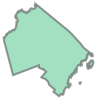

In [3]:
final['geometry'][0]

In [ ]:
final['Center_point'] = final['geometry'].centroid
#Extract lat and lon from the centerpoint
final["lat"] = final.Center_point.map(lambda p: p.x)
final["long"] = final.Center_point.map(lambda p: p.y)

In [ ]:
final.to_csv('for_map.csv')

In [4]:
def osx_amenity(bbox):
    try:
        ox.config(timeout=2000)
        feature_tags = {'amenity': True}
        gdf = ox.geometries.geometries_from_polygon(bbox, tags = feature_tags)
        return dict(gdf['amenity'].value_counts())
    except:
        return 0

In [5]:
def osx_graph(bbox):
    try:
        place = ox.graph_from_polygon(bbox, network_type='drive')
        proj = ox.project_graph(place)
        nodes_proj, edges = ox.graph_to_gdfs(proj)
        graph_area_m = nodes_proj.unary_union.convex_hull.area
        basic_stats = ox.basic_stats(proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
        return basic_stats
    except:
        return 0

In [ ]:
final['amenities'] = final['geometry'].apply(lambda x: osx_amenity(x))

In [ ]:
final['graph'] = final['geometry'].apply(lambda x: osx_graph(x))

In [ ]:
final.to_csv('final.csv')
# final.to_file(filename='final.geojson', driver='GeoJSON')
beep